In [1]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('/heart.csv')
df = pd.DataFrame(dataset)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.isnull().values.any()

False

In [6]:
from sklearn.preprocessing import OneHotEncoder

#one_hot_encoded_data = pd.get_dummies(df, columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
#one_hot_encoded_data


categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X_categorical = df[categorical_cols]

onehotencoder = OneHotEncoder()

X_encoded = onehotencoder.fit_transform(X_categorical).toarray()
X_encoded_columns = onehotencoder.get_feature_names_out(categorical_cols)

X_numerical = df.drop(categorical_cols, axis=1)
X = pd.concat([X_numerical, pd.DataFrame(X_encoded, columns=X_encoded_columns)], axis=1)

df.drop(categorical_cols, axis=1, inplace=True)


df[X_encoded_columns] = pd.DataFrame(X_encoded, columns=X_encoded_columns)

df.head()
#df2 = onehotencoder.fit_transform(df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]).toarray()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Y_scaled = scaler.fit_transform(df[['HeartDisease']])
#y = df['HeartDisease']
y = df.HeartDisease.values
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape
X_test.shape

(184, 21)

In [10]:
X_train

array([[-1.22099397, -0.66993455,  0.37686353, ...,  3.68394199,
        -1.00218103, -0.86905588],
       [-1.85743145, -0.12951283,  0.09330416, ..., -0.27144836,
        -1.00218103,  1.15067399],
       [ 0.2640268 ,  0.95133062,  0.12989247, ..., -0.27144836,
         0.99782372, -0.86905588],
       ...,
       [ 0.68831845, -0.12951283,  0.49577552, ..., -0.27144836,
        -1.00218103,  1.15067399],
       [ 0.68831845,  1.05941496, -1.81843477, ..., -0.27144836,
        -1.00218103,  1.15067399],
       [-1.4331398 ,  0.95133062,  1.76721911, ..., -0.27144836,
         0.99782372, -0.86905588]])

In [11]:
from sklearn.linear_model import LogisticRegression

LogReg_model = LogisticRegression()
LogReg_model.fit(X_train, y_train)
LogReg_model.score(X_test, y_test)

1.0

In [12]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
LR_model.score(X_test, y_test)

1.0

In [13]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
randomforest.score(X_test, y_test)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       107

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



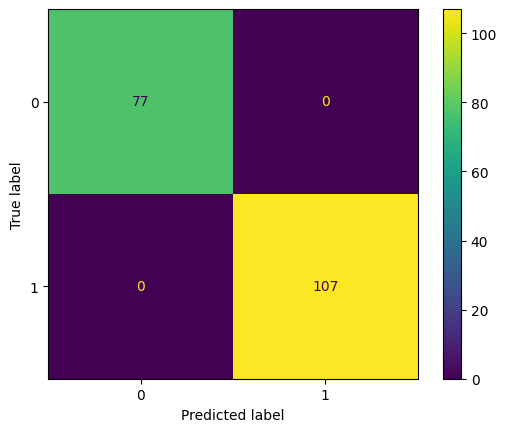

In [14]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc 
from matplotlib import pyplot as plt


y_pred = randomforest.predict(X_test)

rand_forest_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


conMat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conMat,display_labels=randomforest.classes_)
disp.plot()
plt.show()

In [16]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(918, 14)

In [17]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

LogReg_model = LogisticRegression()
LogReg_model.fit(X_train_pca, y_train)
LogReg_model.score(X_test_pca, y_test)

0.8913043478260869

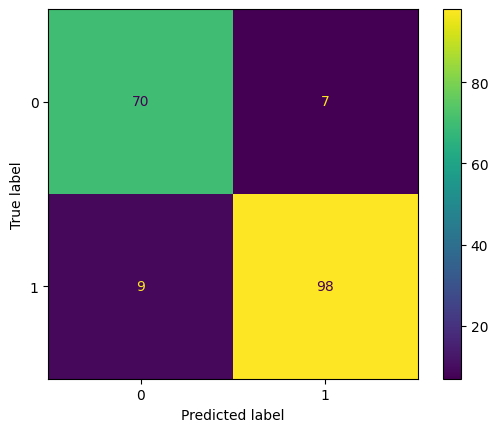

In [20]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train_pca, y_train)
randomforest.score(X_test_pca, y_test)



y_pred_pca = randomforest.predict(X_test_pca)

rand_forest_acc_pca = accuracy_score(y_test, y_pred_pca)

classification_report(y_test, y_pred_pca)


conMat_pca = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=conMat_pca,display_labels=randomforest.classes_)
disp.plot()
plt.show()

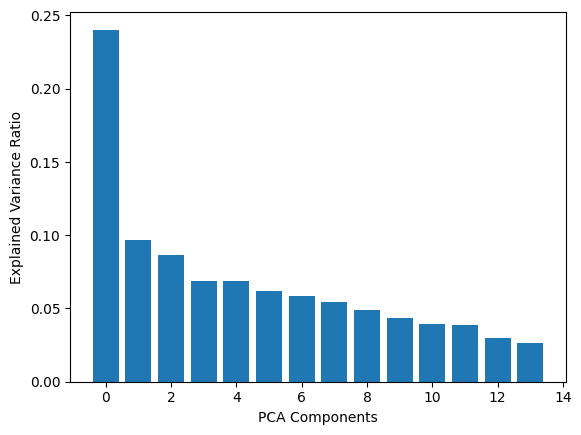

In [21]:
variance_ratio = pca.explained_variance_ratio_


plt.bar(range(len(variance_ratio)), variance_ratio)
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.show()